In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")

In [ ]:
#Find number of exact duplicates
exact_duplicates = df[df.duplicated(keep='first')]
print("Number of duplicates = ",len(exact_duplicates))

Number of duplicates =  273


In [ ]:
print("Number of rows before duplicate deletion = ",len(df))
df = df.drop_duplicates(keep="first")
print("Number of rows after duplicate deletion = ",len(df))

Number of rows before duplicate deletion =  60000
Number of rows after duplicate deletion =  59727


In [ ]:
#Removing elevation attribute, since all values are 0.

print("Number of columns BEFORE elevation column deletion = ",df.shape[1])
df = df.drop("elevation", axis=1)
print("Number of columns AFTER elevation column deletion = ",df.shape[1])


Number of columns BEFORE elevation column deletion =  16
Number of columns AFTER elevation column deletion =  15


In [ ]:
#Converting upper case to lower case for all values in the dataframe, for uniformity

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(20)

In [ ]:
df['flat_type']=df['flat_type'].str[0]
df.head(20)

In [ ]:
print("Number of columns BEFORE furnished column deletion = ",df.shape[1])
df = df.drop("furnished", axis=1)
print("Number of columns AFTER furnished column deletion = ",df.shape[1])

Number of columns BEFORE furnished column deletion =  15
Number of columns AFTER furnished column deletion =  14


In [ ]:
count=0
for row in df.itertuples():
  if(row.planning_area in row.town):
    count+=1
print("number of rows which have `planning_area` as a subset of `town` = ",count)

number of rows which have `planning_area` as a subset of `town` =  58545


In [ ]:
print("Number of columns BEFORE planning_area column deletion = ",df.shape[1])
df = df.drop("planning_area", axis=1)
print("Number of columns AFTER planning_area column deletion = ",df.shape[1])

Number of columns BEFORE planning_area column deletion =  14
Number of columns AFTER planning_area column deletion =  13


In [ ]:
# Count the number of rows with a specific street name using value_counts()
street_counts = df['street_name'].value_counts()
list1=[]
# Replace 'YourStreetName' with the specific street name you want to count
for i in set(df['street_name']):
  specific_street_count = street_counts.get(i, 0)
  #print(f"Streetname: {i}, Number of houses:{specific_street_count}")
  list1.append(specific_street_count)

print(sum(list1)/len(list1))

109.99447513812154


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['town', 'block', 'street_name', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude', 'subzone', 'region']
data=df.copy()


In [ ]:
X = data[features]
y = data['monthly_rent']

X = pd.get_dummies(X, drop_first=True)  #This is a Pandas function called get_dummies(), which is used for one-hot encoding categorical variables.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=100)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [ ]:
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 516474.02226686757


In [ ]:
rms = mse**0.5
print("rms = ",rms)

rms =  718.6612708827905


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Datasets/test.csv")

In [ ]:
y_pred = knn_regressor.predict(df_test)

# Evaluate the model using Mean Squared Error

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=200)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=200)

In [ ]:
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 528966.9190942575


In [ ]:
rms = mse**0.5
print("rms for k=200 is ",rms)

rms for k=200 is  727.3011199594413


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=75)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
rms = mse**0.5
print("rms for k=75 is ",rms)

Mean Squared Error: 510397.47653328866
rms for k=75 is  714.4210778898455


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=50)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
rms = mse**0.5
print("rms for k=50 is ",rms)

Mean Squared Error: 497719.68139963166
rms for k=50 is  705.4925098111472


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=25)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
rms = mse**0.5
print("rms for k=25 is ",rms)

Mean Squared Error: 475538.60304704506
rms for k=25 is  689.5930706199455


In [ ]:
list1=[]
for i in range(10,40):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    rms = mse**0.5
    #print(f"rms for k={i} is ",rms)
    list1.append(mse)


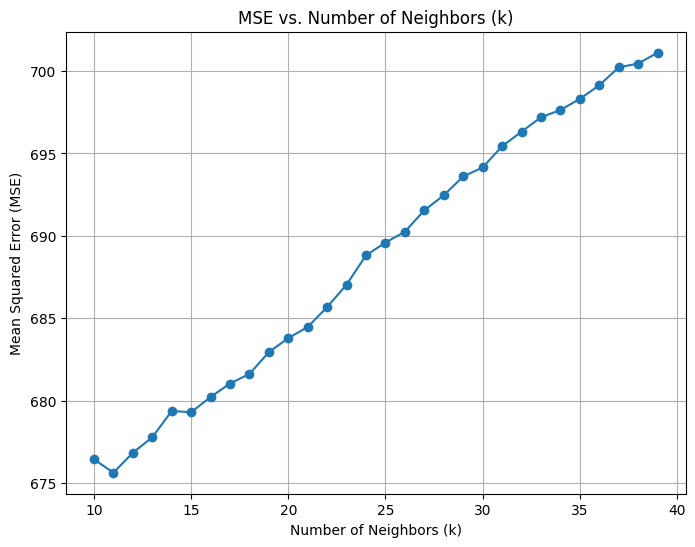

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'list1' contains MSE values and corresponds to k values from 10 to 39
k_values = list(range(10, 40))
list2=[i**0.5 for i in list1]
# Plot MSE values against k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, list2, marker='o', linestyle='-')
plt.title('MSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

Number of rows before duplicate deletion =  59727
Number of rows after duplicate deletion =  59477
Number of columns BEFORE planning_area column deletion =  17
Deleting the categorical columns: ['town', 'flat_model', 'subzone', 'region']
Number of columns AFTER planning_area column deletion =  13


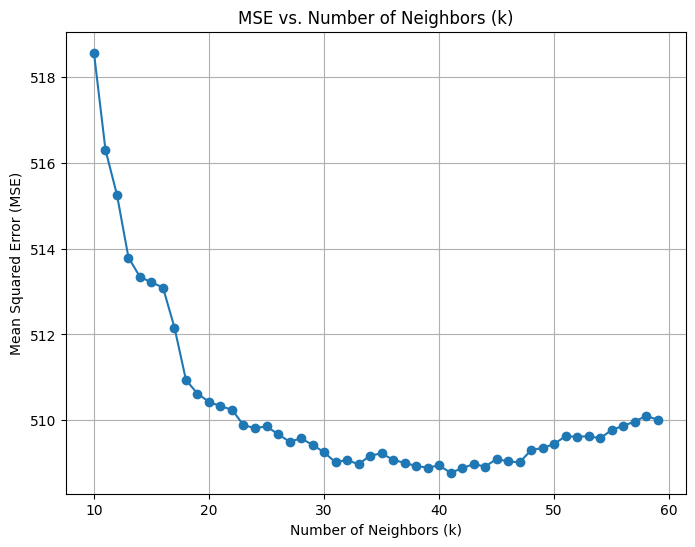

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("cleaned-dataset.csv")

#removing exact duplicates
exact_duplicates = df[df.duplicated(keep='first')]
print("Number of rows before duplicate deletion = ",len(df))
df = df.drop_duplicates(keep="first")
print("Number of rows after duplicate deletion = ",len(df))
print("Number of columns BEFORE planning_area column deletion = ",df.shape[1])
print("Deleting the categorical columns:",list1)
list1=['town','flat_model','subzone','region']
for i in list1:
  df = df.drop(i, axis=1)
print("Number of columns AFTER planning_area column deletion = ",df.shape[1])

features = ['rent_approval_date', 'flat_type', 'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude', 'distance_to_nearest_existing_mrt',	'distance_to_nearest_planned_mrt',	'distance_to_nearest_school',	'distance_to_nearest_mall',	'coe_price_indicator','stock_price']
data=df.copy()
X = data[features]
y = data['monthly_rent']
#This is a Pandas function called get_dummies(), which is used for one-hot encoding categorical variables.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
list2=[]
for i in range(10,60):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    rms = mse**0.5
    #print(f"rms for k={i} is ",rms)
    list2.append(rms)


k_values = list(range(10, 60))
# Plot MSE values against k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, list2, marker='o', linestyle='-')
plt.title('RMSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()



In [ ]:
print(min(list2),list2.index(min(list2))+10)

508.77666897400434 41
